## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('weight_height_data.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


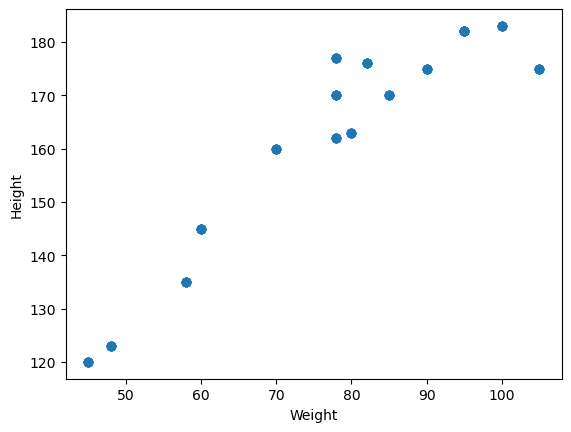

In [3]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


In [4]:
## Co-relation
df.corr()

,Weight,Height
Weight,1.000000,0.939461
Height,0.939461,1.000000


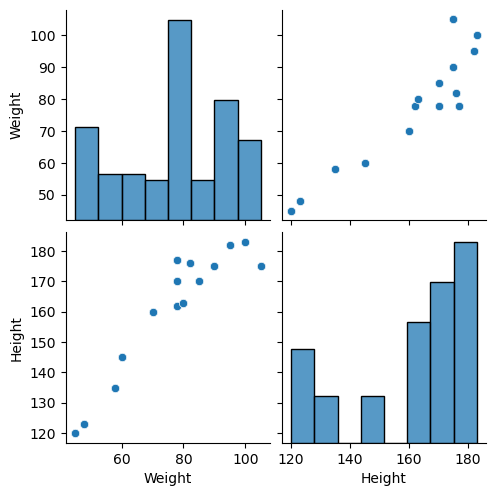

In [5]:
#Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()


In [6]:
## Independent and Dependent Features
X = df[['Weight']]     ## Should be Always a DataFrame or 2D Array
Y = df['Height']        ##This variable can be in series or 2d Array


In [7]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
...,...
95,78
96,45
97,58
98,48


In [8]:
Y

0     120
1     135
2     123
3     145
4     160
     ... 
95    177
96    120
97    135
98    123
99    145
Name: Height, Length: 100, dtype: int64

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [11]:
## Standardization
from sklearn.preprocessing import StandardScaler


In [12]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.11940144],
       [ 1.08292568],
       [-1.75096916],
       [ 0.11940144],
       [ 1.08292568],
       [ 1.08292568],
       [ 0.11940144],
       [ 0.11940144],
       [ 1.64970465],
       [ 1.36631516],
       [ 0.11940144],
       [-1.58093547],
       [-1.0141565 ],
       [-0.90080071],
       [-1.75096916],
       [-1.0141565 ],
       [-1.58093547],
       [ 0.7995362 ],
       [ 0.11940144],
       [ 1.08292568],
       [-0.90080071],
       [-1.0141565 ],
       [ 0.11940144],
       [ 0.51614671],
       [ 1.36631516],
       [ 1.08292568],
       [-0.90080071],
       [-1.0141565 ],
       [ 0.23275723],
       [ 1.08292568],
       [ 0.51614671],
       [ 0.23275723],
       [-1.75096916],
       [-0.33402174],
       [ 0.11940144],
       [ 1.08292568],
       [-0.90080071],
       [ 0.23275723],
       [ 1.08292568],
       [-1.58093547],
       [-0.90080071],
       [ 0.51614671],
       [-0.33402174],
       [ 1.36631516],
       [-1.0141565 ],
       [ 0

In [13]:
X_test=scaler.transform(X_test)


In [14]:
X_test

array([[-0.90080071],
       [ 0.11940144],
       [ 0.23275723],
       [ 1.36631516],
       [ 1.64970465],
       [ 0.7995362 ],
       [ 0.23275723],
       [-1.75096916],
       [ 0.34611302],
       [-1.75096916],
       [-1.58093547],
       [ 0.51614671],
       [ 0.11940144],
       [-1.0141565 ],
       [ 0.34611302],
       [-0.33402174],
       [ 1.64970465],
       [ 1.36631516],
       [ 1.64970465],
       [ 0.11940144],
       [ 0.7995362 ],
       [ 1.08292568],
       [ 0.34611302],
       [ 0.34611302],
       [ 0.11940144]])

In [15]:
## Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
print(regression)

LinearRegression()


In [19]:
regression.coef_

array([1.13437816])

In [20]:
print("Coefficient or slope ",regression.coef_)
print("Intercept ",regression.intercept_)

Coefficient or slope  [1.13437816]
Intercept  74.09492666055978


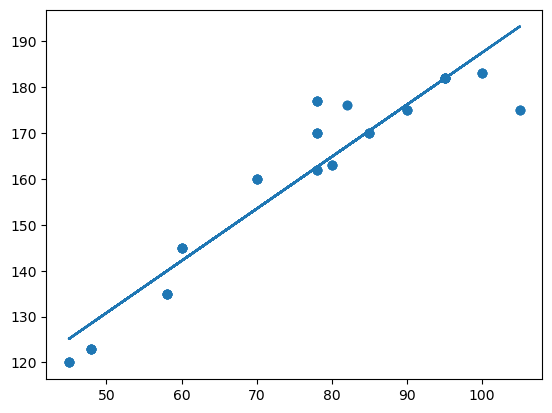

In [21]:
##plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

## PREDICTION of TEST DATA1
1. predicted height uotput = intercept +coef(weights)
2. y_pred_test = 74.09 + 1.13(X_test)

In [22]:
## Prediction for Test Data
y_pred=regression.predict(X_test)

c:\Users\Soubh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
## Performence  Metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse =  mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8345.561152786457
89.51846685449814
91.35404289239999


## R Square

Formulae

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of square of residuals SST = total sum of squares

In [28]:
from sklearn.metrics import r2_score


In [30]:
score = r2_score(y_test,y_pred)
print(score)

-21.558887449361354


##  Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)] 

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [33]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-22.53970864281185

In [35]:
## OLS TECHNIQUE
import statsmodels.api as sm

In [36]:
model = sm.OLS(y_train,X_train).fit()

In [38]:
prediction = model.predict(X_test)
print(prediction)

[-1.85620948  0.24604119  0.4796246   2.81545868  3.3994172   1.64754164
  0.4796246  -3.60808504  0.71320801 -3.60808504 -3.25770993  1.06358312
  0.24604119 -2.08979289  0.71320801 -0.68829244  3.3994172   2.81545868
  3.3994172   0.24604119  1.64754164  2.23150016  0.71320801  0.71320801
  0.24604119]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              5863.
Date:                Sun, 15 Jun 2025   Prob (F-statistic):                    3.23e-72
Time:                        13:08:34   Log-Likelihood:                         -323.36
No. Observations:                  75   AIC:                                      648.7
Df Residuals:                      74   BIC:                                      651.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Prediction for new data